<a href="https://colab.research.google.com/github/cabbi120101/TIL/blob/master/ML/2%EC%B0%A8%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8/%EC%98%88%EC%B8%A1%EA%B0%92ET%EA%B7%B8%EB%9E%98%ED%94%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 40 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (6,865 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [1]:
import pandas as pd
# 2019년 상권 추정매출 데이터 불러오기
pred_et = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/멀티캠/머신러닝/2차프로젝트/매출추정자료/et매출추정')
pred_et.head()

,index,기준_분기_코드,분기당_매출_건수,주중_매출_비율,주말_매출_비율,월요일_매출_비율,화요일_매출_비율,수요일_매출_비율,목요일_매출_비율,금요일_매출_비율,토요일_매출_비율,일요일_매출_비율,시간대_00~06_매출_비율,시간대_06~11_매출_비율,시간대_11~14_매출_비율,시간대_14~17_매출_비율,시간대_17~21_매출_비율,시간대_21~24_매출_비율,남성_매출_비율,여성_매출_비율,연령대_10_매출_비율,연령대_20_매출_비율,연령대_30_매출_비율,연령대_40_매출_비율,연령대_50_매출_비율,연령대_60_이상_매출_비율,주중_매출_건수,주말_매출_건수,월요일_매출_건수,화요일_매출_건수,수요일_매출_건수,목요일_매출_건수,금요일_매출_건수,토요일_매출_건수,일요일_매출_건수,시간대_건수~06_매출_건수,시간대_건수~11_매출_건수,시간대_건수~14_매출_건수,시간대_건수~17_매출_건수,시간대_건수~21_매출_건수,...,서비스_업종_코드_명_여관,서비스_업종_코드_명_예술학원,서비스_업종_코드_명_완구,서비스_업종_코드_명_외국어학원,서비스_업종_코드_명_운동/경기용품,서비스_업종_코드_명_육류판매,서비스_업종_코드_명_의료기기,서비스_업종_코드_명_의약품,서비스_업종_코드_명_인테리어,서비스_업종_코드_명_일반교습학원,서비스_업종_코드_명_일반의류,서비스_업종_코드_명_일반의원,서비스_업종_코드_명_일식음식점,서비스_업종_코드_명_자동차미용,서비스_업종_코드_명_자동차수리,서비스_업종_코드_명_자전거 및 기타운송장비,서비스_업종_코드_명_전자상거래업,서비스_업종_코드_명_제과점,서비스_업종_코드_명_조명용품,서비스_업종_코드_명_중식음식점,서비스_업종_코드_명_철물점,서비스_업종_코드_명_청과상,서비스_업종_코드_명_치과의원,서비스_업종_코드_명_치킨전문점,서비스_업종_코드_명_커피-음료,서비스_업종_코드_명_컴퓨터및주변장치판매,서비스_업종_코드_명_패스트푸드점,서비스_업종_코드_명_편의점,서비스_업종_코드_명_피부관리실,서비스_업종_코드_명_한식음식점,서비스_업종_코드_명_한의원,서비스_업종_코드_명_핸드폰,서비스_업종_코드_명_호프-간이주점,서비스_업종_코드_명_화장품,서비스_업종_코드_명_화초,상권_구분_코드_A,상권_구분_코드_D,상권_구분_코드_R,상권_구분_코드_U,Label
0,65498,6,37988,65,35,13,13,13,12,15,17,18,0,10,27,29,28,6,45,55,1,24,20,20,22,13,24554,13434,4911,4437,4975,4661,5570,6464,6970,5,3952,9921,11393,10092,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2.549663e+08
1,66015,6,2501,69,31,16,6,16,15,16,14,17,0,1,23,45,29,2,45,55,0,35,33,18,11,3,1726,775,393,148,405,381,399,358,417,0,23,575,1128,735,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2.288798e+07
2,65968,6,8566,59,41,11,11,12,12,14,22,19,0,1,14,27,43,15,34,66,2,60,23,8,7,1,5033,3533,926,912,1033,991,1171,1870,1663,10,70,1221,2310,3665,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1.032168e+08
3,66034,6,15637,50,50,9,7,9,10,15,28,22,1,2,24,37,31,6,52,48,2,34,31,17,11,4,9717,5920,1993,1665,1919,2007,2133,3127,2793,178,431,4230,4941,4593,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1.323195e+08
4,65932,6,4761,78,22,18,12,21,12,15,10,12,0,9,35,40,17,0,33,67,0,23,12,28,29,7,3741,1020,890,575,995,575,706,445,575,0,523,1700,1831,707,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3.484863e+07


In [6]:
광진구_시장 = ['봉천중앙시장', '중부시장', '낙성대시장', '인헌시장', '현대시장']
pred_et['index'] = 광진구_시장

In [ ]:
pred_et = pred_et.reset_index()

In [7]:
pred_et

,index,기준_분기_코드,분기당_매출_건수,주중_매출_비율,주말_매출_비율,월요일_매출_비율,화요일_매출_비율,수요일_매출_비율,목요일_매출_비율,금요일_매출_비율,토요일_매출_비율,일요일_매출_비율,시간대_00~06_매출_비율,시간대_06~11_매출_비율,시간대_11~14_매출_비율,시간대_14~17_매출_비율,시간대_17~21_매출_비율,시간대_21~24_매출_비율,남성_매출_비율,여성_매출_비율,연령대_10_매출_비율,연령대_20_매출_비율,연령대_30_매출_비율,연령대_40_매출_비율,연령대_50_매출_비율,연령대_60_이상_매출_비율,주중_매출_건수,주말_매출_건수,월요일_매출_건수,화요일_매출_건수,수요일_매출_건수,목요일_매출_건수,금요일_매출_건수,토요일_매출_건수,일요일_매출_건수,시간대_건수~06_매출_건수,시간대_건수~11_매출_건수,시간대_건수~14_매출_건수,시간대_건수~17_매출_건수,시간대_건수~21_매출_건수,...,서비스_업종_코드_명_여관,서비스_업종_코드_명_예술학원,서비스_업종_코드_명_완구,서비스_업종_코드_명_외국어학원,서비스_업종_코드_명_운동/경기용품,서비스_업종_코드_명_육류판매,서비스_업종_코드_명_의료기기,서비스_업종_코드_명_의약품,서비스_업종_코드_명_인테리어,서비스_업종_코드_명_일반교습학원,서비스_업종_코드_명_일반의류,서비스_업종_코드_명_일반의원,서비스_업종_코드_명_일식음식점,서비스_업종_코드_명_자동차미용,서비스_업종_코드_명_자동차수리,서비스_업종_코드_명_자전거 및 기타운송장비,서비스_업종_코드_명_전자상거래업,서비스_업종_코드_명_제과점,서비스_업종_코드_명_조명용품,서비스_업종_코드_명_중식음식점,서비스_업종_코드_명_철물점,서비스_업종_코드_명_청과상,서비스_업종_코드_명_치과의원,서비스_업종_코드_명_치킨전문점,서비스_업종_코드_명_커피-음료,서비스_업종_코드_명_컴퓨터및주변장치판매,서비스_업종_코드_명_패스트푸드점,서비스_업종_코드_명_편의점,서비스_업종_코드_명_피부관리실,서비스_업종_코드_명_한식음식점,서비스_업종_코드_명_한의원,서비스_업종_코드_명_핸드폰,서비스_업종_코드_명_호프-간이주점,서비스_업종_코드_명_화장품,서비스_업종_코드_명_화초,상권_구분_코드_A,상권_구분_코드_D,상권_구분_코드_R,상권_구분_코드_U,Label
0,봉천중앙시장,6,37988,65,35,13,13,13,12,15,17,18,0,10,27,29,28,6,45,55,1,24,20,20,22,13,24554,13434,4911,4437,4975,4661,5570,6464,6970,5,3952,9921,11393,10092,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2.549663e+08
1,중부시장,6,2501,69,31,16,6,16,15,16,14,17,0,1,23,45,29,2,45,55,0,35,33,18,11,3,1726,775,393,148,405,381,399,358,417,0,23,575,1128,735,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2.288798e+07
2,낙성대시장,6,8566,59,41,11,11,12,12,14,22,19,0,1,14,27,43,15,34,66,2,60,23,8,7,1,5033,3533,926,912,1033,991,1171,1870,1663,10,70,1221,2310,3665,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1.032168e+08
3,인헌시장,6,15637,50,50,9,7,9,10,15,28,22,1,2,24,37,31,6,52,48,2,34,31,17,11,4,9717,5920,1993,1665,1919,2007,2133,3127,2793,178,431,4230,4941,4593,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1.323195e+08
4,현대시장,6,4761,78,22,18,12,21,12,15,10,12,0,9,35,40,17,0,33,67,0,23,12,28,29,7,3741,1020,890,575,995,575,706,445,575,0,523,1700,1831,707,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3.484863e+07


In [8]:
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame

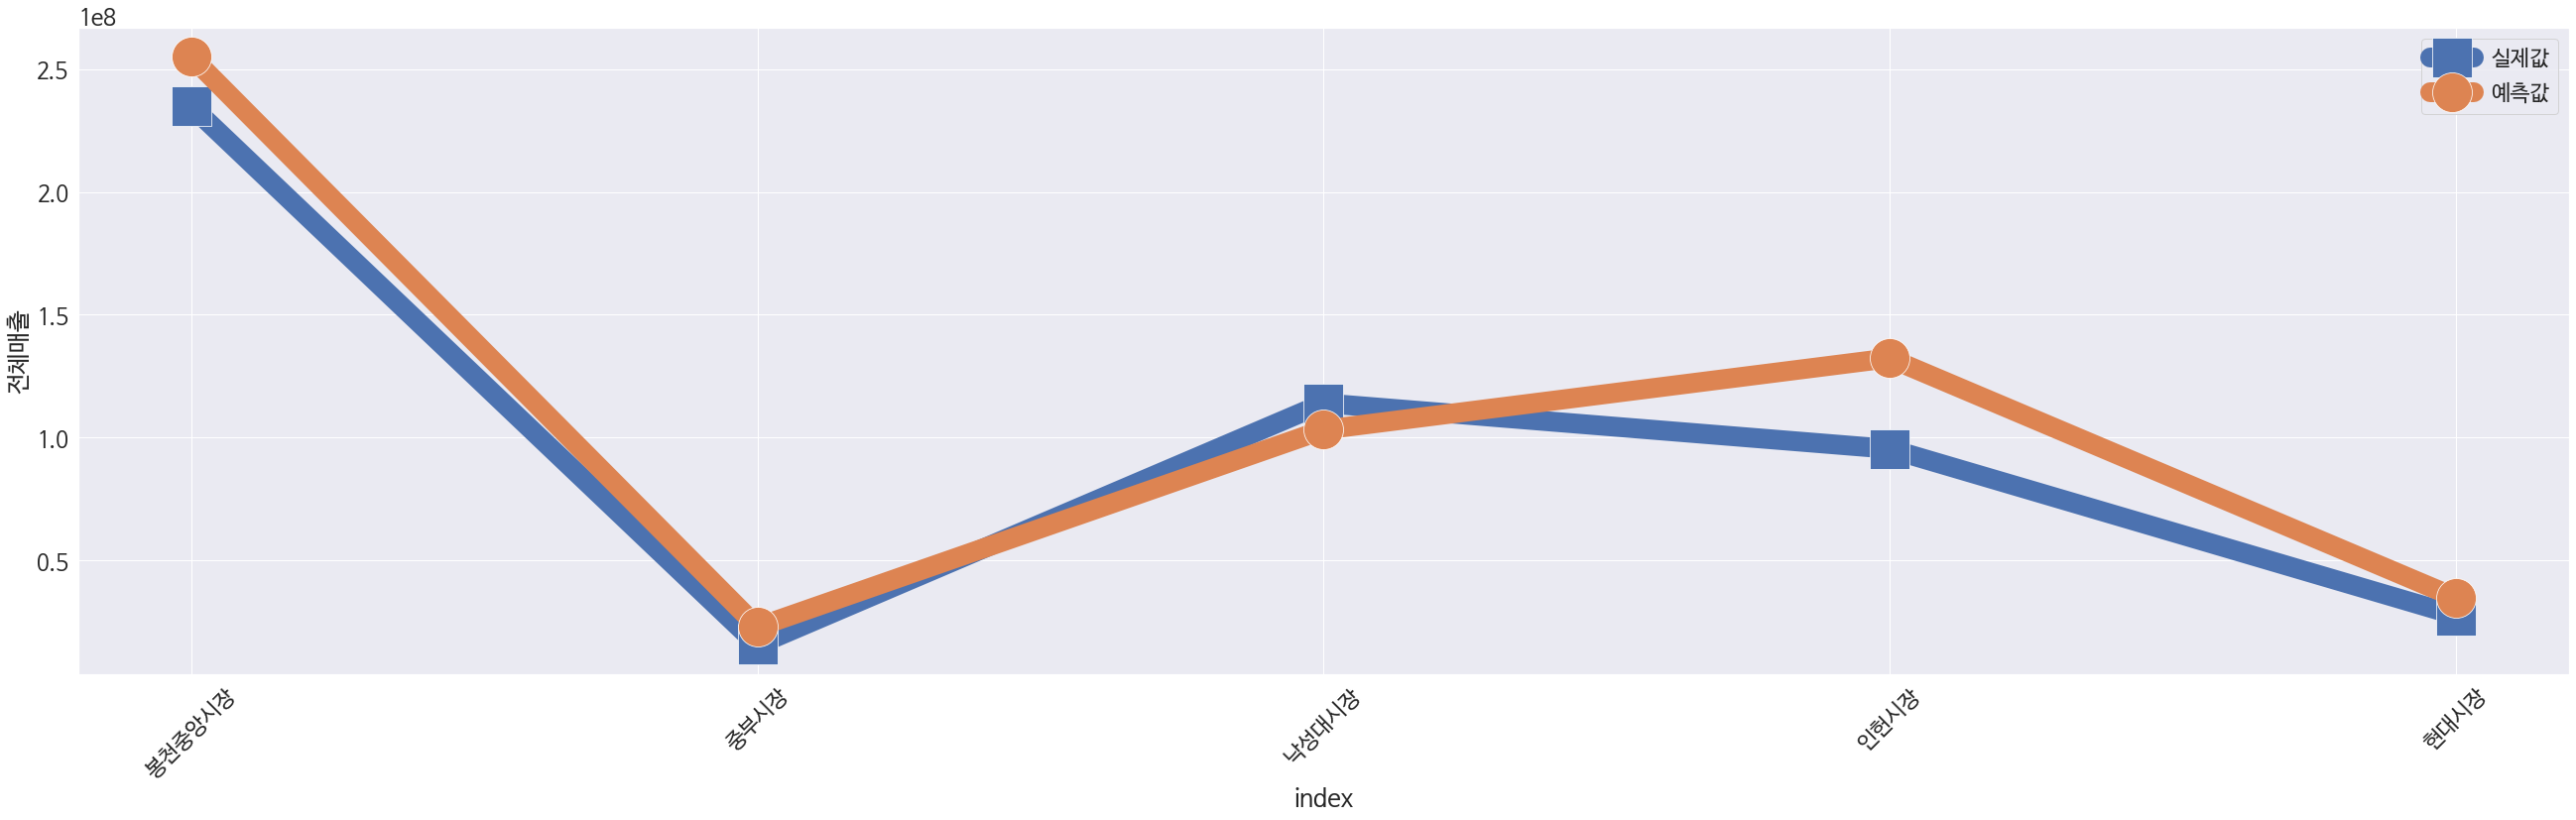

In [12]:
plt.figure(figsize=(45,12))
sns.set(font="NanumBarunGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid',
        font_scale=2,
        )


sns.lineplot(
    x = pred_et['index'],
    y = pred_et['전체매출'],
    data = pred_et,
    # sort = pred_et['level_0'].sort_values,
    linestyle='solid', # 선 스타일
    linewidth=20, # 선두께
    marker='s',
    markersize=40,

)
sns.lineplot(
    x = pred_et['index'],
    y = pred_et['Label'],
    data = pred_et,
    # sort = pred_et['level_0'].sort_values,
    linestyle='solid', # 선 스타일
    linewidth=20, # 선두께
    marker='o',
    markersize=40,

)
plt.legend(['실제값', '예측값']) ## 범례 생성
plt.xticks(rotation=45) # x축 눈금 라벨 설정 - 45도 회전
plt.savefig('/content/data/광진구커피매출액비교.png',dpi=100)
plt.show()